In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers, datasets
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data
data_Train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 6000 files belonging to 2 classes.


In [ ]:
# loading the data
data_Valid = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Valid",
    image_size=(64, 64),
    color_mode="grayscale"
)

Found 2000 files belonging to 2 classes.


In [ ]:
# to determine which number between 0 and 1 that represents each class - Real images and Fake images
data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Group_Project_Data/Train")
data_iterator = data.as_numpy_iterator() #converts the data to numpy array

Found 6000 files belonging to 2 classes.


In [ ]:
batch = data_iterator.next() # to take one batch at a time, then take the next

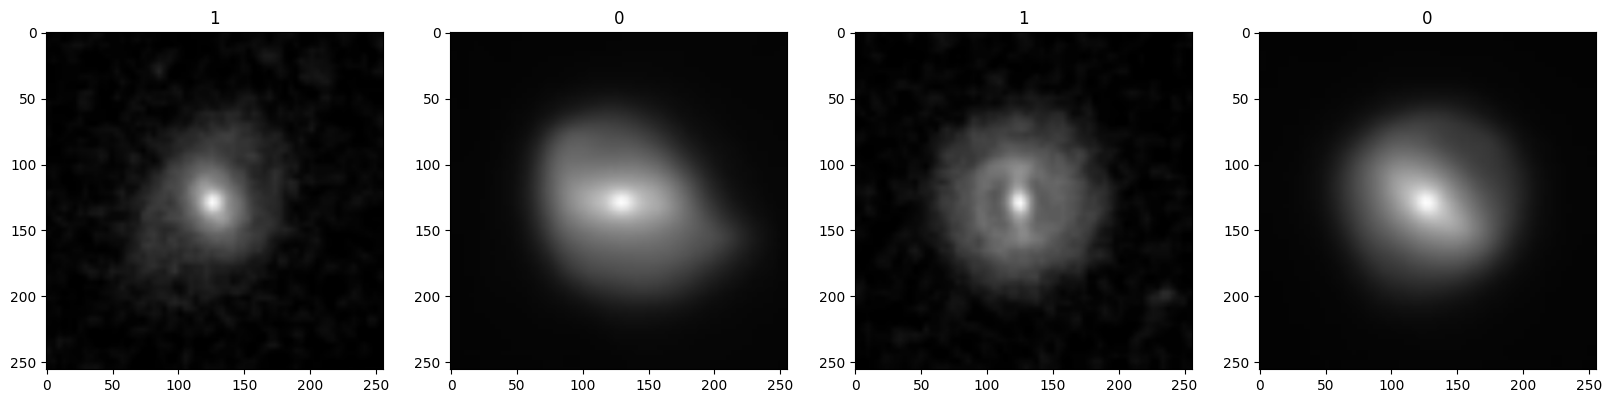

In [ ]:
# plotting the class and labels; from the plot below, 1 represents the Real image class, 0 represents the Fake image class
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# scaling the data to normalize
data_Train = data_Train.map(lambda x,y: (x/255, y))

In [ ]:
data_Valid = data_Valid.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data_Train))
val_size = int(len(data_Valid))

In [ ]:
train = data_Train.take(train_size)
val = data_Valid.take(val_size)

In [ ]:
image_model = tf.keras.Sequential([
    layers.Conv2D(64, 3, activation="relu", padding="same", input_shape=(64, 64, 1)),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
image_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
image_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 256)       

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Stop training when validation loss does not improve
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore the best model weights when training stops
)


In [ ]:
history = image_model.fit(
    train, 
    epochs=50,
    validation_data=val,
    callbacks=[early_stopping],
)

Epoch 1/50
188/188 [==============================] - 5s 16ms/step - loss: 0.0701 - accuracy: 0.9678 - val_loss: 1.0588 - val_accuracy: 0.7325
Epoch 2/50
188/188 [==============================] - 3s 16ms/step - loss: 0.0793 - accuracy: 0.9715 - val_loss: 0.0106 - val_accuracy: 0.9970
Epoch 3/50
188/188 [==============================] - 3s 16ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0121 - val_accuracy: 0.9985
Epoch 4/50
188/188 [==============================] - 3s 17ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0172 - val_accuracy: 0.9980
Epoch 5/50
188/188 [==============================] - 3s 16ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0144 - val_accuracy: 0.9980


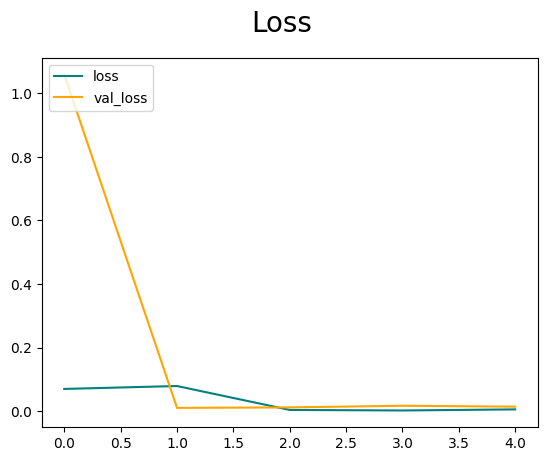

In [ ]:
#plotting the loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

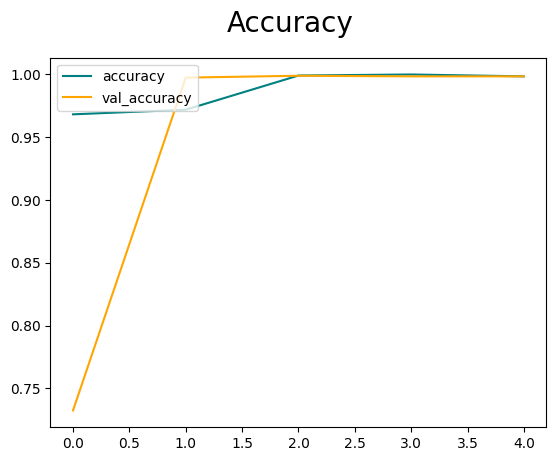

In [ ]:
#plotting the accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Group_Project_Data/Valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        shuffle=False)

# Predict labels for test set
y_pred = image_model.predict(test_generator)

# Get true labels for test set
y_true = test_generator.classes

# Get filenames for test set
filenames = test_generator.filenames

# Determine which images were correctly predicted
correct_predictions = 0

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5 and y_true[i] == 1:
        correct_predictions += 1
    elif y_pred[i] < 0.5 and y_true[i] == 0:
        correct_predictions += 1

# Print number of correct predictions
print(f'Number of correct predictions: {correct_predictions}')

Found 2000 images belonging to 2 classes.


InternalError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Group_Project_Data/Valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary',
        color_mode='grayscale',
        shuffle=False)

X_test, y_test = [], []
for i in range(len(valid_generator)):
    batch = valid_generator[i]
    X_test.append(batch[0])
    y_test.append(batch[1])

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

Found 2000 images belonging to 2 classes.


In [ ]:
data_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_test = data_test.batch(32)

# Evaluate the model on the test data
loss, accuracy = image_model.evaluate(data_test)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

63/63 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.9995
Test loss: 0.0010385112836956978
Test accuracy: 0.9994999766349792


In [ ]:
test_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Group_Project_Data/Valid',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

predictions = image_model.predict(test_generator)

Found 2000 images belonging to 2 classes.
63/63 [==============================] - 2s 33ms/step


In [ ]:
test_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Group_Project_Data/Valid',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

# Predict labels for test set
y_pred = image_model.predict(test_generator)

# Get true labels for test set
y_true = test_generator.classes

# Get filenames for test set
filenames = test_generator.filenames

# Determine which images were correctly predicted
correct_predictions = []
incorrect_predictions = []

for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
        correct_predictions.append(filenames[i])
    else:
        incorrect_predictions.append(filenames[i])

# Print number of correct and incorrect predictions
print(f'Number of correct predictions: {len(correct_predictions)}')
print(f'Number of incorrect predictions: {len(incorrect_predictions)}')

Found 2000 images belonging to 2 classes.


InternalError: ignored

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
test_iterator = data_Valid.as_numpy_iterator()
batch = test_iterator.next()
for batch in batch:
    X, y = batch[0], batch[1]
    X_resized = tf.image.resize(X, size=(64, 64))
    yhat = image_model.predict(X_resized)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

ValueError: ignored

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the trained model
#model = tf.keras.models.load_model('path/to/model')

# Load the input image and preprocess it
image = Image.open('/content/drive/MyDrive/Group_Project_Data/Valid').convert('L')  # Convert the image to grayscale
image = image.resize((64, 64))  # Resize the image to (64, 64)
image_array = np.array(image)  # Convert the image to a numpy array
image_array = image_array.reshape(1, 64, 64, 1)  # Reshape the array to (1, 64, 64, 1)
image_array = image_array / 255.0  # Normalize the pixel values to [0, 1]

# Make a prediction using the model
prediction = image_model.predict(image_array)[0]

# Interpret the prediction
if prediction >= 0.5:
    print("The image is real.")
else:
    print("The image is fake.")

IsADirectoryError: ignored